###### A/B Testing for Better Marketing Strategy

**A/B testing** plays a critical role in decision-making processes across various industries. A/B testing is essentially a method of comparing and testing the effectiveness and benefits of two different business strategies

In a typical A/B testing setting, you would create and test two or more versions of marketing strategies for their effectiveness in achieving your marketing goal. Consider a case where your goal is to improve marketing email open rates. If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

**Statistical hypothesis testing**
Student's t-test, or simply the t-test, is frequently used to test whether the difference between two tests is statistically significant. The t-test compares the two averages and examines whether they are significantly different from each other

There are two important statistics in a t-test—the t-value and p-value. 
- The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups. 

- On the other hand, the p-value measures the probability that the results would occur by chance. The smaller the p-value is, the more statistically significant difference there will be between the two groups

The equation to compute the t-value is:
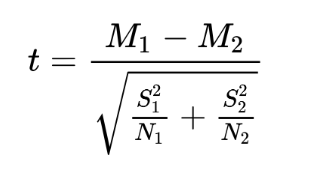

In this equation, M1 and M2 are the averages of group 1 and 2. S1 and S2 are the standard deviations of group 1 and 2, and N1 and N2 are number of samples in group 1 and 2 respectively

Generally speaking, the null hypothesis is that the two groups show no statistically significant difference. On the other hand, the alternate hypothesis states that the two groups show a statistically significant difference. **When the t-value is larger than a threshold and the p-value is smaller than a threshold, we say that we can reject the null hypothesis and that the two groups show a statistically significant difference**. Typically, 0.01 or 0.05 are used as the p-value thresholds for testing statistical significance. If the p-value is less than 0.05, then it suggests that there is less than 5% probability that the difference between the two groups occurs by chance. In other words, the difference is highly unlikely to be by chance


###### Case Study: Evaluate A/B testing results to understand Promotion Effectiveness for a Fast Food Chain
Scenario
A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

- MarketID：Unique identifier for market (1 – 10).
- MarketSize：Size of market area by sales (Small, Medium, Large).
- LocationID：Unique identifier for store location.
- AgeOfStore：Age of store in years (1 – 28).
- Promotion：One of three promotions that was tested (1, 2, 3).
- week：One of four weeks when the promotions were run (1 – 4).
- SalesInThousands：Sales amount for a specific LocationID, Promotion and week.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('AB-Marketing-Campaign-Eff-UseC_-FastF.xlsx')

In [6]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,Week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


**Data analysis**:
We are going to focus on understanding the distributions of sales, market sizes, store locations, and store ages used to test different promotions. The goal of this analysis is to make sure the controls and attributes of each of the promotion groups are symmetrically distributed, so that the promotion performances among different groups are comparable to each other

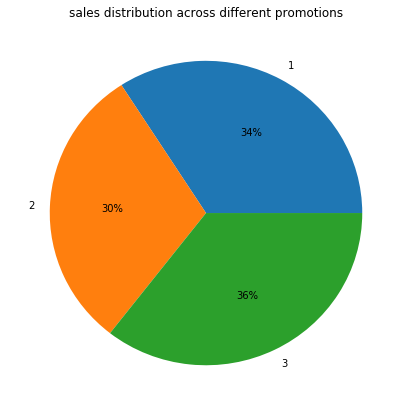

In [7]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

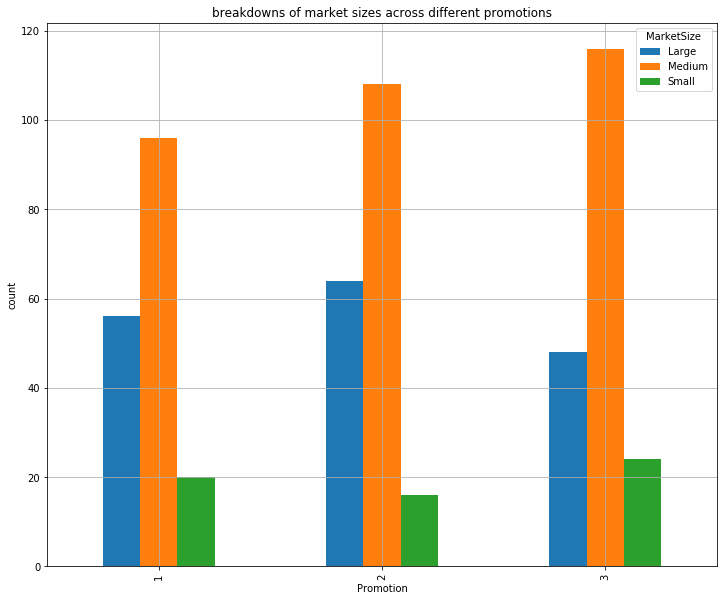

In [8]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

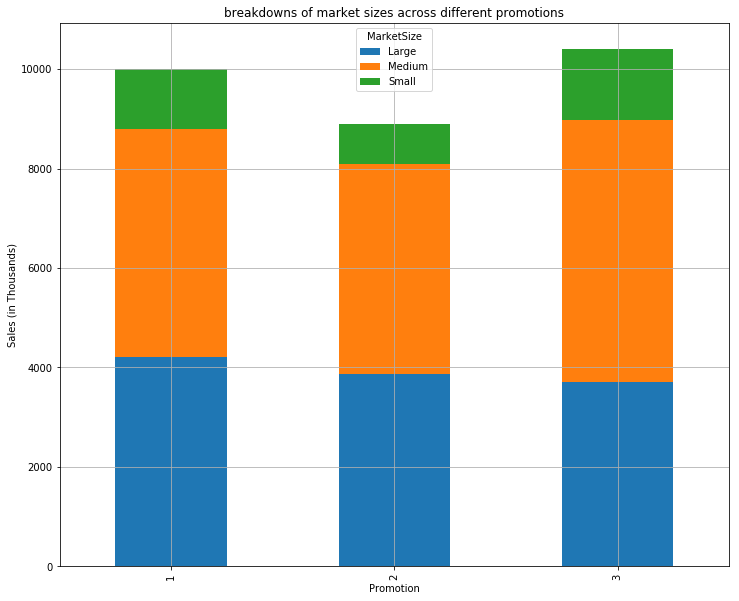

In [9]:
# stacked bar
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

#We can verify that the compositions of different market sizes are similar among the three promotion groups from this plot

In [ ]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [ ]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [ ]:
df.groupby('Promotion').describe()['AgeOfStore']
#As you may notice from this output, it is much easier to understand the overall store age distributions from these summary statistics. 
#We can see that all three test groups seem to have similar store age profiles. 
#The average ages of stores for the three groups are 8–9 years old and the majority of the stores are 10–12 years old or younger

In [ ]:
#Week Number
df.groupby('Week').count()['MarketID']

In [ ]:
df.groupby(['Promotion', 'Week']).count()['MarketID']

In [ ]:
ax1, ax2, ax3 = df.groupby(
    ['Week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

By analyzing how each promotion or test group is comprised, we could verify that the store profiles are similar to each other. This suggests that the sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

Statistical hypothesis testing: a strategy having a higher response number does not necessarily mean that it outperforms the rest. We will discuss how we can use the t-test to evaluate the relative performances of different marketing strategies and see which strategy wins over the others with significance.
In Python, there are two approaches to computing the t-value and p-value in a t-test

- Computing t-value and p-value from the equations

In [ ]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

In [ ]:
# Promotion 1 vs. 2
import numpy as np

t_1_vs_2 = (means.iloc[0] - means.iloc[1])/ np.sqrt((stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1]))

In [ ]:
# get p value:
from scipy import stats

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2 #the degrees of freedom, which is the sum of the number of samples in both groups minus two

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2 #compute the p-value, using the t.cdf function from scipy package's stats module

p_1_vs_2
# The p-value we get from running this code is 4.143e-10. This is an extremely small number that is close to 0
# a p-value closer to 0 suggests that there is a strong evidence against the null hypothesis and that the difference between the two test groups is significant
# so the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2

- Computing the t-value and p-value using scipy

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)
# the stats module from the scipy package has a function named ttest_ind. 
# This function computes t-value and p-value, given the data

In [ ]:
t

In [ ]:
p

In [ ]:
# Promotion 1 vs. 3
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [ ]:
t

In [ ]:
p

In [ ]:
means

we can conclude that promotion groups 1 and 3 outperform promotion group 2, but the difference between promotion groups 1 and 3 is not statistically significant